                                            Jewellery Dataset Exploration

In [61]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [62]:
df = pd.read_csv('jewellery.csv')
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


### Clustering or Dimensionality Reduction

This project is focused towards clustering for the given dataset

### Data Description and Attributes

- Dataset has four features - Age, Income, Spending Score, Savings
- Age - Integer data
- Income - Salary data in Interger
- Spending Score - Expenditure data in Float
- Savings - Float data

In [64]:
df.shape

(505, 4)

In [65]:
df.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


### Data Cleaning and Exploration

In [66]:
# Check for Null Values
df.isna().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [67]:
df.dtypes

Age                int64
Income             int64
SpendingScore    float64
Savings          float64
dtype: object

(4.5, -0.5)

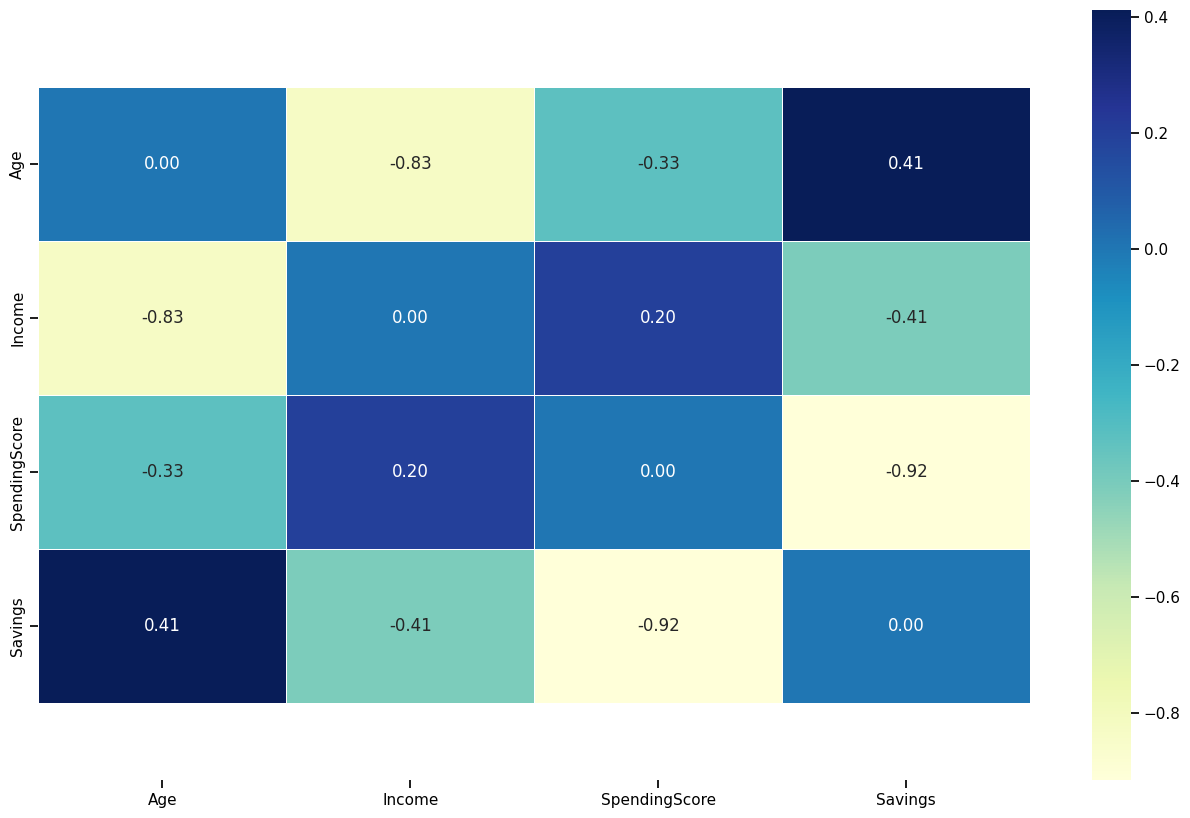

In [68]:
# Studying the correlations between features using Heat Map!
corr_matrix = df.corr()
for x in range(corr_matrix.shape[0]):
    corr_matrix.iloc[x,x] = 0.0

fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [69]:
# The correlation matrix
corr_mat = df.corr()

# Strip out the diagonal values for the next step
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,Age,Income,SpendingScore,Savings
Age,0.000000,-0.828457,-0.329116,0.412337
Income,-0.828457,0.000000,0.196111,-0.410774
SpendingScore,-0.329116,0.196111,0.000000,-0.915379
Savings,0.412337,-0.410774,-0.915379,0.000000


In [70]:
# Pairwise maximal correlations 
corr_max  = corr_mat.abs().max().to_frame()
corr_id_max = corr_mat.abs().idxmax().to_frame()

# dataframe aggrigation and processing
pair_features_corr = pd.merge(corr_id_max, corr_max, on = corr_max.index)
pair_features_corr = pair_features_corr.rename(columns = {'key_0':'Feature_one', '0_x':'Feature_two', '0_y':'correlation'})\
                                                .sort_values('correlation', ascending=False)\
                                                .reset_index().drop('index', axis=1)
pair_features_corr

,Feature_one,Feature_two,correlation
0,SpendingScore,Savings,0.915379
1,Savings,SpendingScore,0.915379
2,Age,Income,0.828457
3,Income,Age,0.828457


### Feature Engineering

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

In [72]:
df

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
...,...,...,...,...
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445


### Model Creation

1. K-Means

In [73]:
from sklearn.cluster import KMeans

# Create and fit a range of models
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(df_scaled)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

c:\Users\shankesh\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


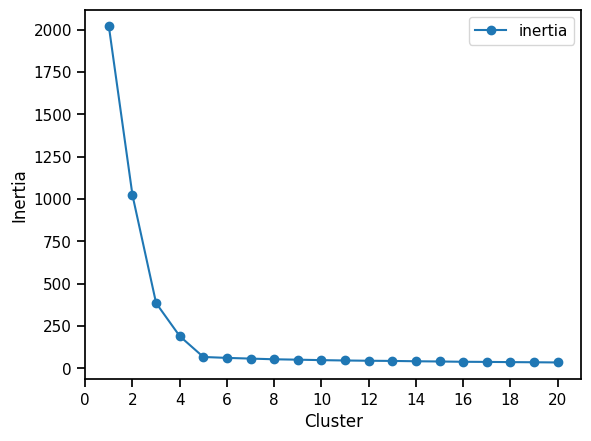

In [74]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');

2. Agglomerative Algorithm

In [75]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=7, linkage='ward', compute_full_tree=True)
ag = ag.fit(df_scaled)

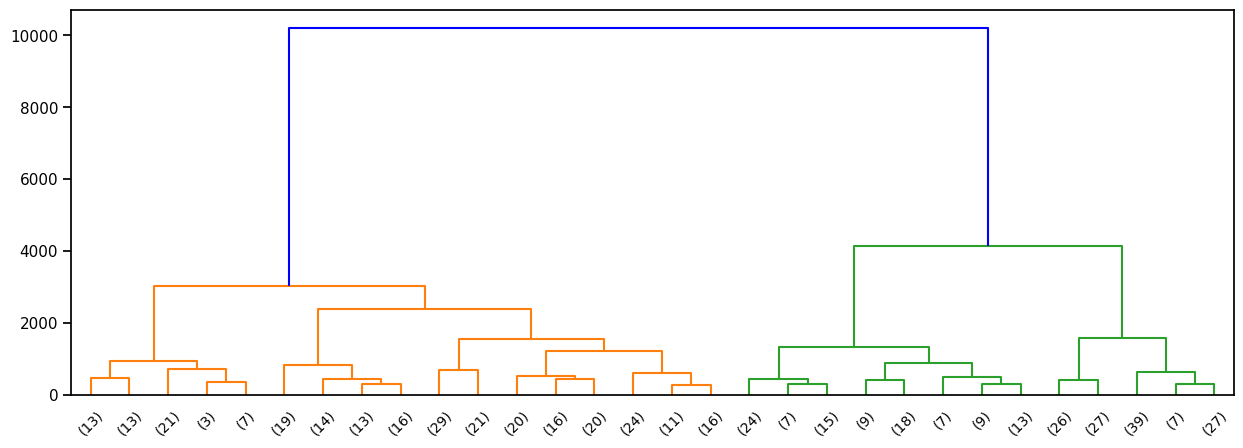

In [76]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')

4. DBSCAN Algorithm

In [77]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.5, min_samples=11, metric='euclidean')
dbs = dbs.fit(df_scaled)

In [78]:
np.unique(dbs.labels_)

array([0, 1, 2, 3, 4], dtype=int64)

In [83]:
df_old = pd.DataFrame(df_scaled, columns = ['Age','Income','Expenditure','Savings'])
df = pd.DataFrame(dbs.fit_predict(df_scaled), columns = ['Group'])
df_new = pd.concat([df_old, df], axis = 1)
df_new

,Age,Income,Expenditure,Savings,Group
0,-0.042287,0.062733,1.103593,-1.072467,0
1,-0.000821,0.174811,1.102641,-1.303473,0
2,0.123577,-0.021200,0.761727,-0.526556,0
3,-0.000821,-0.031712,1.004705,-0.913395,0
4,1.160228,-1.606165,-0.602619,1.012686,1
...,...,...,...,...,...
500,-1.286268,0.714535,-0.453557,0.621787,4
501,1.409024,-1.545704,-1.164109,1.235201,1
502,1.284626,-1.118447,-0.578054,0.855313,1
503,1.326092,-1.524929,-0.579866,1.322452,1


In [86]:
df_new.groupby(['Group']).count()

,Age,Income,Expenditure,Savings
Group,,,,
0,157,157,157,157
1,147,147,147,147
2,50,50,50,50
3,25,25,25,25
4,126,126,126,126


### Best Model

For the given dataset both K-Means and DBScan performs similar with 4 clusters seems to be the best fit

### Key Findings and Insights

- In Agglomerative model it has classified into 2 clusters which seems to be incorrect 


-----------------------------------------------------------------Thank You by Shankesh Raju MS -----------------------------------------------------------------